# Title

# Screen Capture

In [7]:
import pyscreenshot as ImageGrab
import time

In [8]:
images_folder="captured_images/"
  
for i in range(0,0):
   time.sleep(7)
   im=ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2
   print("saved......",i)
   im.save(images_folder+str(i)+'.png')
   print("clear screen now and redraw now........")

print("Razorshi sir Photo taking loop is over.")

Razorshi sir Photo taking loop is over.


# Generate dataset

In [9]:
import cv2
import csv
import glob
 
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
   
for label in range(10):
   dirList = glob.glob("captured_images/"+str(label)+"/*.png")
   
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
       
       data=[]
       data.append(label)
       rows, cols = roi.shape
       
       ## Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)

PermissionError: [Errno 13] Permission denied: 'dataset.csv'

# Load the dataset:

In [10]:
import pandas as pd #pip install pandas
from sklearn.utils import shuffle #pip install scikit-learn
#0,....,1.....,2.....
#5,3,1,0,2,5,.......

data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
66       3       0       0       0       0       0       0       0       0   
179      6       0       0       0       0       0       0       0       0   
265      8       0       0       0       0       0       0       0       0   
195      6       0       0       0       0       0       0       0       0   
274      8       0       0       0       0       0       0       0       0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
236      7       0       0       0       0       0       0       0       0   
33       1       0       0       0       0       0       0       0       0   
108      5       0       0       0       0       0       0       0       0   
173      6       0       0       0       0       0       0       0       0   
84       4       0       0       0       0       0       0       0       0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel

# Separating dependent and independent variables:

In [11]:
X = data.drop(["label"],axis=1)
Y= data["label"]

# Preview of one image using matplotlib

5


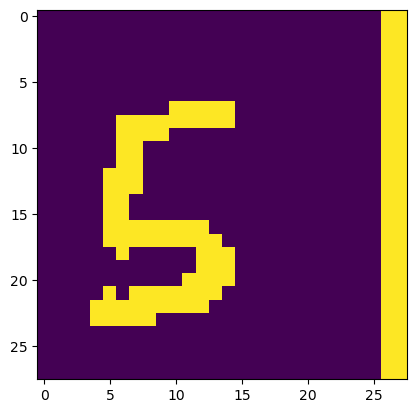

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 116
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

# Train-Test split

In [13]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

# Fit the model using svc and also save the model using joblib

In [14]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

# Calculate accuracy

In [15]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.9295774647887324


# prediction of image drawn in paint

In [ ]:
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
 
model=joblib.load("model/digit_recognizer")
image_folder="img/"
 
while True:
   img=ImageGrab.grab(bbox=(60,170,400,500))
   
   img.save(images_folder+"img.png")
   im = cv2.imread(images_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
   
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
   
   rows,cols=roi.shape
   
   X = []
   
   ##  Fill the data array with pixels one by one.
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
           
   predictions  =model.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
   
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
       break
cv2.destroyAllWindows()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8
